<a href="https://colab.research.google.com/github/rsha0812/EVA4-S11/blob/master/EVA4S11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import math
from datafile import *
from NewModel import *
from lr_finder import *
from OneCyclePolicy import *
import torch.nn as nn
import torch.nn.functional as F
from trainingfile import *

[0.1, 0.27999999999999997, 0.45999999999999996, 0.6400000000000001, 0.8200000000000001, 1.0, 0.8200000000000001, 0.6400000000000001, 0.45999999999999996, 0.27999999999999997, 0.1, 0.28000000000000014, 0.45999999999999996, 0.6400000000000001, 0.8199999999999998, 1.0, 0.8199999999999998, 0.6400000000000001, 0.45999999999999996, 0.28000000000000014, 0.1, 0.28000000000000014, 0.4600000000000003, 0.6399999999999997, 0.8199999999999998]


# Data Loader

In [2]:
trainloader, testloader, classes = getData()

Files already downloaded and verified
Files already downloaded and verified


# Device

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

cuda


# Model Summary

In [4]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

# LR_Finder

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


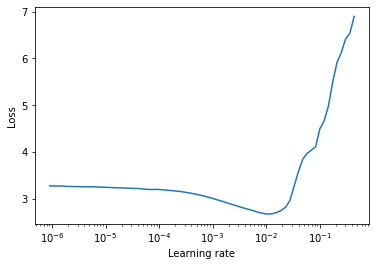

In [5]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset()

# OneCyclePolicy

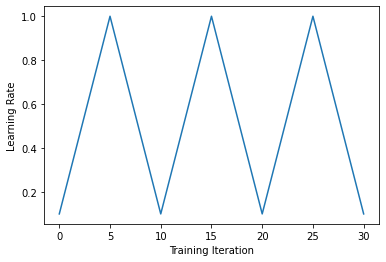

In [6]:
import matplotlib.pyplot as plt
var = OneCyclePolicy(1,5,30)
plt.plot(var)
plt.xlabel('Training Iteration')
plt.ylabel('Learning Rate')
plt.show()


# Execution(Train/Test Accuracy for 50 Epochs)

In [7]:
Training(24, model, device, trainloader, testloader, 0.015)
ClassTestAccuracy(testloader, device, model, classes)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.267361044883728 Batch_id=97 Accuracy=39.92: 100%|██████████| 98/98 [00:23<00:00,  4.12it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3940, Accuracy: 5077/10000 (50.77%)

EPOCH: 1


Loss=1.124018669128418 Batch_id=97 Accuracy=57.48: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.1662, Accuracy: 6046/10000 (60.46%)

EPOCH: 2


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0656, Accuracy: 6709/10000 (67.09%)

EPOCH: 3


Loss=0.7259930372238159 Batch_id=97 Accuracy=70.73: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8790, Accuracy: 7257/10000 (72.57%)

EPOCH: 4


Loss=0.7370705604553223 Batch_id=97 Accuracy=73.48: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8406, Accuracy: 7349/10000 (73.49%)

EPOCH: 5


Loss=1.0083367824554443 Batch_id=97 Accuracy=76.05: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9009, Accuracy: 7590/10000 (75.90%)

EPOCH: 6


Loss=0.5560675859451294 Batch_id=97 Accuracy=81.15: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6310, Accuracy: 8044/10000 (80.44%)

EPOCH: 7


Loss=0.501692533493042 Batch_id=97 Accuracy=85.96: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4147, Accuracy: 8621/10000 (86.21%)

EPOCH: 8


Loss=0.2984163761138916 Batch_id=97 Accuracy=88.30: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4577, Accuracy: 8502/10000 (85.02%)

EPOCH: 9


Loss=0.28793734312057495 Batch_id=97 Accuracy=90.21: 100%|██████████| 98/98 [00:23<00:00,  4.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4123, Accuracy: 8682/10000 (86.82%)

EPOCH: 10


Loss=0.17163921892642975 Batch_id=97 Accuracy=92.00: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3610, Accuracy: 8831/10000 (88.31%)

EPOCH: 11


Loss=0.23154370486736298 Batch_id=97 Accuracy=91.82: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3892, Accuracy: 8751/10000 (87.51%)

EPOCH: 12


Loss=0.2595270872116089 Batch_id=97 Accuracy=91.13: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4842, Accuracy: 8466/10000 (84.66%)

EPOCH: 13


Loss=0.38687101006507874 Batch_id=97 Accuracy=89.22: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5922, Accuracy: 8323/10000 (83.23%)

EPOCH: 14


Loss=0.35123470425605774 Batch_id=97 Accuracy=88.12: 100%|██████████| 98/98 [00:23<00:00,  4.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5079, Accuracy: 8467/10000 (84.67%)

EPOCH: 15


Loss=0.3583534061908722 Batch_id=97 Accuracy=87.12: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5817, Accuracy: 8382/10000 (83.82%)

EPOCH: 16


Loss=0.34511667490005493 Batch_id=97 Accuracy=89.91: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5419, Accuracy: 8431/10000 (84.31%)

EPOCH: 17


Loss=0.2798769772052765 Batch_id=97 Accuracy=91.03: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4418, Accuracy: 8726/10000 (87.26%)

EPOCH: 18


Loss=0.13154837489128113 Batch_id=97 Accuracy=93.39: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3999, Accuracy: 8852/10000 (88.52%)

EPOCH: 19


Loss=0.09472920000553131 Batch_id=97 Accuracy=94.88: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3711, Accuracy: 8906/10000 (89.06%)

EPOCH: 20


Loss=0.09456628561019897 Batch_id=97 Accuracy=95.80: 100%|██████████| 98/98 [00:23<00:00,  4.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3325, Accuracy: 8994/10000 (89.94%)

EPOCH: 21


Loss=0.09883676469326019 Batch_id=97 Accuracy=95.90: 100%|██████████| 98/98 [00:23<00:00,  4.10it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3541, Accuracy: 8976/10000 (89.76%)

EPOCH: 22


Loss=0.09487148374319077 Batch_id=97 Accuracy=95.19: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4076, Accuracy: 8826/10000 (88.26%)

EPOCH: 23


Loss=0.22044073045253754 Batch_id=97 Accuracy=93.60: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]



Test set: Average loss: 0.4202, Accuracy: 8836/10000 (88.36%)

Accuracy of plane : 71 %
Accuracy of   car : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 58 %
Accuracy of  deer : 100 %
Accuracy of   dog : 66 %
Accuracy of  frog : 72 %
Accuracy of horse : 100 %
Accuracy of  ship : 91 %
Accuracy of truck : 100 %


# Graph

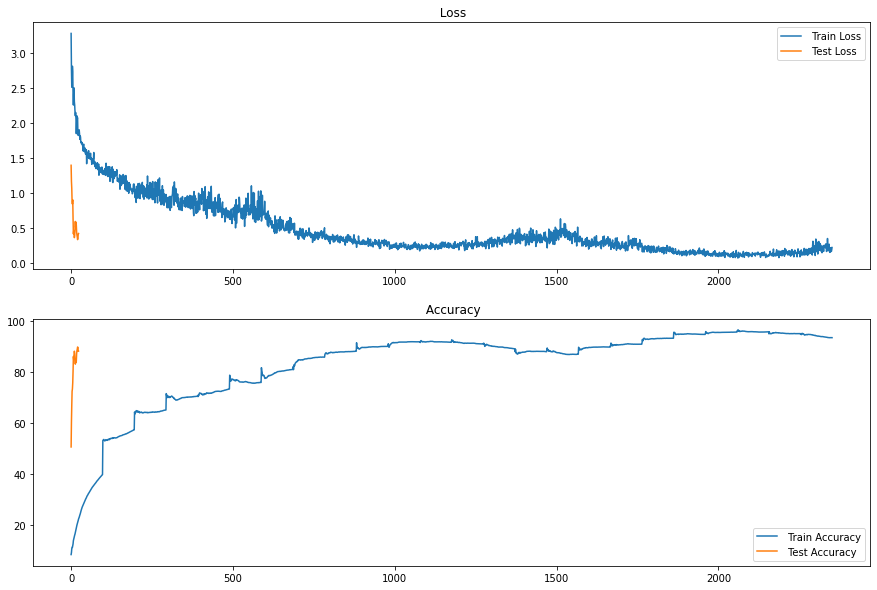

In [8]:
plotPerformanceGraph( )